# Decision Tree - to classify the breast cancer instance is benign or malignant

## Dataset Decription

1. Dataset Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Number of Instances: 699 (as of 15 July 1992)

3. Number of Attributes: 10 plus the class attribute
  Attributes 2 through 10 have been used to represent instances.
  
   Attribute Information: (class attribute has been moved to last column)

   Attribute                     Domain
   --------------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
  
4. Each instance has one of 2 possible classes: benign or malignant.

5. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

6. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)
   
   
   
Read the dataset file

In [4]:
import pandas as pd 
import numpy as np 
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from pandas import Series,DataFrame

data_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv') 

#data_df = pd.read_csv('./breast-cancer-wisconsin.data') 
data_df.shape
display(data_df)

data_df.info()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#replace all column names to easy understand
data_df.columns = ['Sample code id','Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape',
                   'Marginal Adhesion ','Single Epithelial Cell Size','Bare Nuclei',
                  'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

display(data_df)

,Sample code id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


## EDA

SWEETVIZ_REPORT.html

In [3]:
import sweetviz as sv 
data_df_report = sv.analyze(data_df)
data_df_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


delete all the rows that data is '?' and dropna

In [3]:
data_df=data_df[~data_df[:].isin(['?'])]
data_df = data_df.dropna()
display(data_df)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


## build DecisionTree model



In [20]:
# Let's extract features data assigning to X and labels data assigning to Y. >> X,y
X = pd.DataFrame(data_df[:], columns = data_df.columns[1:-1])
Y = pd.DataFrame(data_df[:], columns = data_df.columns[-1:])

print(X)

print(Y)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        4                         4   
1                  3                        1                         1   
2                  6                        8                         8   
3                  4                        1                         1   
4                  8                       10                        10   
..               ...                      ...                       ...   
693                3                        1                         1   
694                2                        1                         1   
695                5                       10                        10   
696                4                        8                         6   
697                4                        8                         8   

     Marginal Adhesion   Single Epithelial Cell Size Bare Nuclei  \
0                     5        

Here we split the dataset for two training and testing. The training subset is for building our model. The testing subset is for using the model on unknown data to evaluate the accuracy of the model.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape

((545, 9), (545, 1), (137, 9))

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
# Defining and fitting a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train,Y_train)

Use the testing dataset to evaluate the accuracy. We will have a accuracy score between 0 to 100

the accuracy is more than 90%, it shows the model is pretty good.

In [26]:
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

96.35

In [27]:
Y_pred_train = decision_tree.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train, Y_pred_train,pos_label= 2))

Training Set Evaluation F1-Score=> 1.0


In [28]:
Y_pred_test = decision_tree.predict(X_test)
print('Training Set Evaluation F1-Score=>',f1_score(Y_test, Y_pred_test,pos_label= 2 ))

Training Set Evaluation F1-Score=> 0.9720670391061451


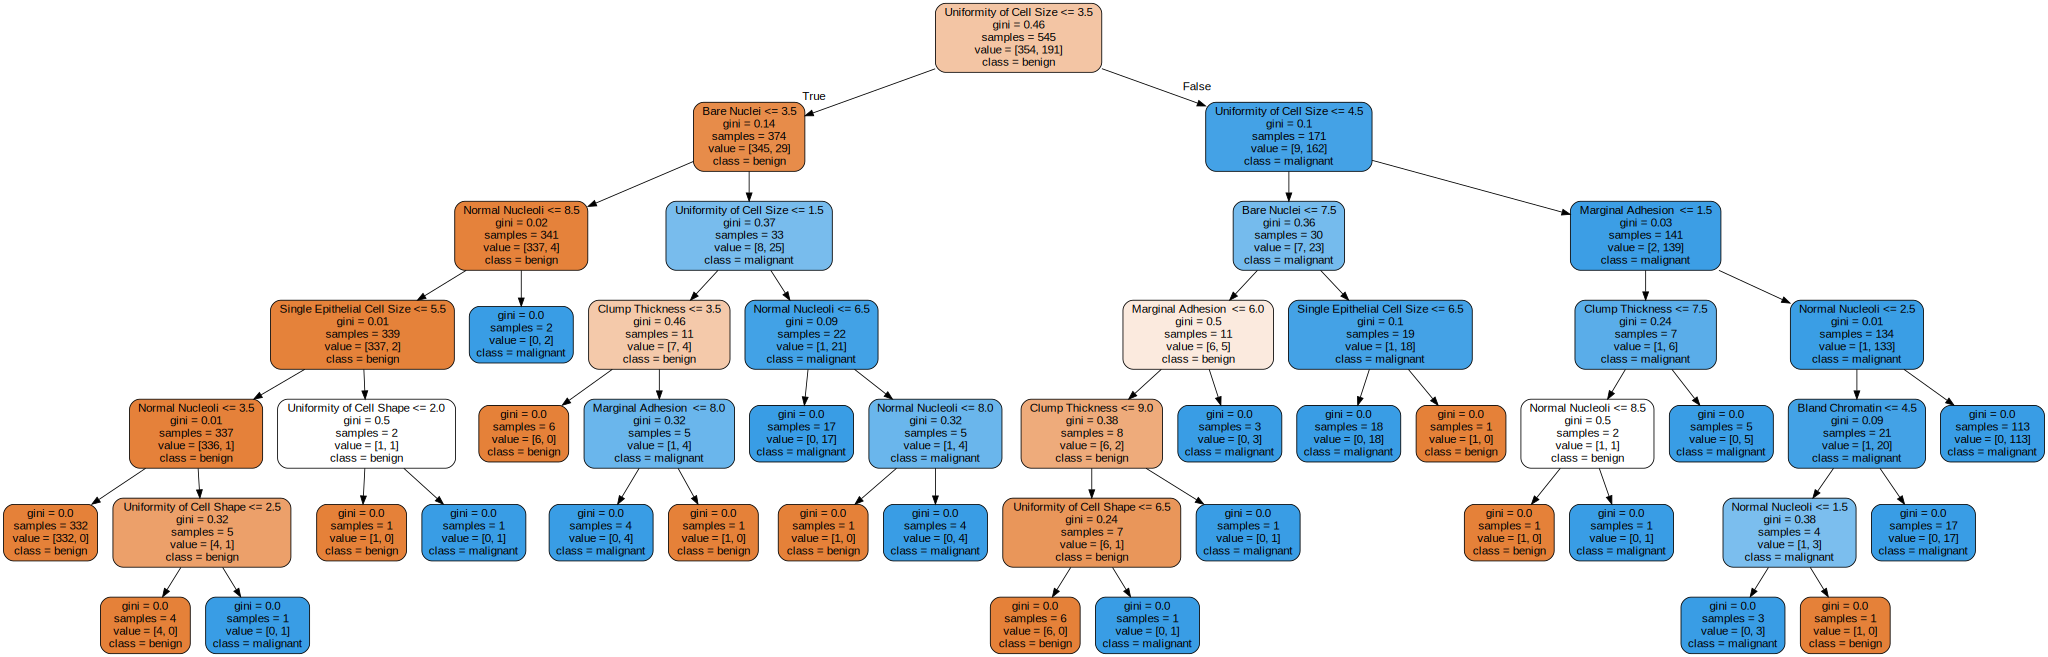

In [29]:
from sklearn.tree import export_graphviz
import graphviz
# Export as dot file

target_names = ['benign','malignant']
out_dot = export_graphviz(decision_tree, out_file=None, 
                feature_names = data_df.columns[1:-1],
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

#convert the dot to graph and show it
graph = graphviz.Source(out_dot) 
display(graph)

# Random Forest Classifier

In [40]:
#build model
from sklearn.ensemble import RandomForestClassifier
#
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 21)
rfc.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(criterion='entropy', random_state=21)

In [41]:
# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train, pos_label= 2))

Training Set Evaluation F1-Score=> 1.0


In [42]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Training Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test, pos_label= 2))

Training Set Evaluation F1-Score=> 0.9720670391061451


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier()

In [46]:
# predict the test data and ACC
y_predicted_knn = KNN.predict(X_test) 
print("Accuracy KNN:",metrics.accuracy_score(Y_test, y_predicted_knn))

Accuracy KNN: 0.9781021897810219


# Cross Validation

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [52]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('Random', RandomForestClassifier()))


In [48]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, Y, stratify = Y, random_state=0)

In [57]:
names = []
scores = []

for name,model in models:
    model.fit(X_train_cross, y_train_cross.values.ravel())
    y_predit_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_predit_cross, y_test_cross))
    names.append(name)
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

     Name     Score
0     KNN  0.947368
1    Tree  0.923977
2  Random  0.959064


In [62]:
strat_k_fold = StratifiedKFold(n_splits=10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, Y.values.ravel(), cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

     Name     Score
0     KNN  0.970737
1    Tree  0.945801
2  Random  0.967818


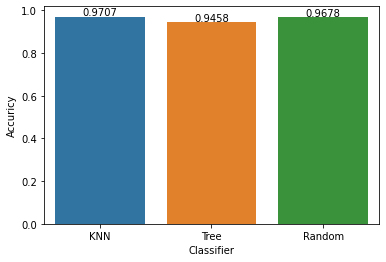

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data= kf_cross_val)

axis.set(xlabel = 'Classifier', ylabel = 'Accuricy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:.4f}'.format(height), ha="center") 
    
plt.show()